In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
digits = load_digits()
x = digits.data
y = digits.target
print("Image Data Shape: "+str(x.shape))
print("Labels Data Shape: "+str(y.shape))

Image Data Shape: (1797, 64)
Labels Data Shape: (1797,)


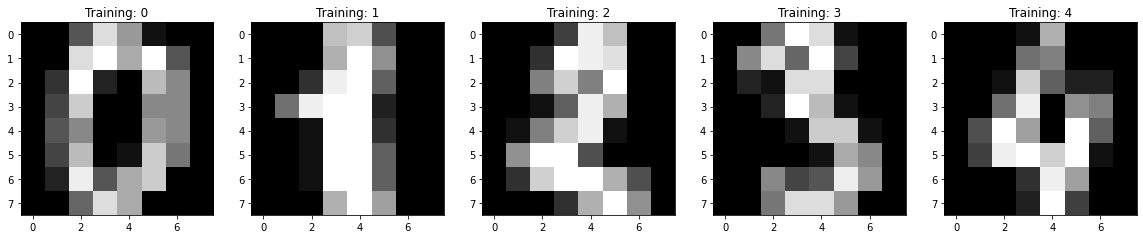

In [3]:
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(x[:5], y[:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title("Training: "+str(label))

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [5]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\gobus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

array([9])

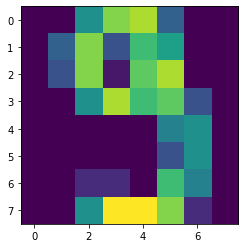

In [6]:
plt.imshow(np.reshape(x_test[2], (8, 8)))
model.predict([x_test[2]])

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.93      0.95      0.94        56
           2       1.00      1.00      1.00        54
           3       0.98      0.94      0.96        62
           4       0.96      0.92      0.94        53
           5       0.95      0.95      0.95        59
           6       1.00      0.96      0.98        56
           7       0.98      0.98      0.98        55
           8       0.83      0.94      0.88        47
           9       0.89      0.91      0.90        44

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.96      0.95      0.95       540


CONFUSION MATRIX
[[53  0  0  0  1  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  3  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 58  0  2  0  1  1  0]
 [ 0  0  0  0 49  0  0  0  2  2]
 [ 0  0  0  0  1 56  0  0  0  2]
 [ 0  1  0  0  0  0 54  0

<AxesSubplot:>

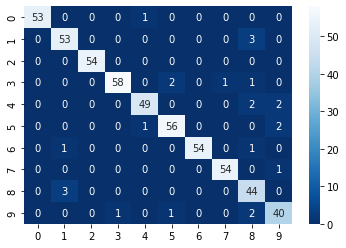

In [18]:
#Evaluating Performance of Model

y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX")
print("=================")
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, cmap='Blues_r', annot=True)